In [1]:
# Libraries
import scipy.io as sio
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import operator
import statistics
import math
from collections import Counter
from sklearn import ensemble
from sklearn import svm 
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
%config InlineBackend.figure_format = 'retina'

In [2]:
# You can use the draw_heatmap_multi() to draw a heatmap to visualize.

def draw_heatmap_multi(acc, acc_desc, classifier, accuracyType):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=classifier, yticklabels=accuracyType)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$Classifier$', ylabel='$Accuracy Type$')
    plt.title(acc_desc + ' w.r.t $Classifier$ and $Accuracy Type$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [15]:
# Getting data from files

# Adult dataset
df = pd.read_csv('adult.data', index_col=False, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'])
af = pd.get_dummies(df)
af = af.drop(columns=['label_ <=50K']) # drop column so label_>50K will give label for classification.

# Seismic-bumps dataset
df2 = pd.read_csv('seismic-bumps.csv', index_col=False)
Y_s = df2['class']
df2.drop(columns=['id', 'class'], inplace=True)
df2 = pd.get_dummies(df2)

# Spambase dataset
df3 = pd.read_csv('spambase.data', index_col=False, header=None)

In [16]:
# Get all Adult data into numpy matrix
X_Y = af.values
print('X_Y shape:', X_Y.shape)
np.random.shuffle(X_Y) 
X_Y = X_Y[:1500, :] # Resizing dataset for running optimization
print('X_Y shape:', X_Y.shape)

X_Y shape: (32561, 109)
X_Y shape: (1500, 109)


In [17]:
# Seismic data
X_s = df2.values
y_s = Y_s.values

# Unbalanced data so using SMOTE to balance by over-sampling
print('Original dataset shape %s' % Counter(y_s))
sm = SMOTE(sampling_strategy=1)
X_s, y_s = sm.fit_resample(X_s, y_s)
print('Resampled dataset shape %s' % Counter(y_s))
y_s = y_s.reshape(4828,1)
X_Y_seismic = np.append(X_s, y_s, 1)

np.random.shuffle(X_Y_seismic)
print('X_Y_seismic shape:', X_Y_seismic.shape)
X_Y_seismic = X_Y_seismic[:1500, :] # Resizing
print('X_Y_seismic shape after resizing:', X_Y_seismic.shape)

Original dataset shape Counter({0: 2414, 1: 170})
Resampled dataset shape Counter({0: 2414, 1: 2414})
X_Y_seismic shape: (4828, 25)
X_Y_seismic shape after resizing: (1500, 25)


In [18]:
# Spambase dataset 
X_Y_spam = df3.values
np.random.shuffle(X_Y_spam)
print('X_Y_spam shape:', X_Y_spam.shape)
X_Y_spam = X_Y_spam[:1500, :] # Resizing
print('X_Y_spam shape after resizing:', X_Y_spam.shape)

X_Y_spam shape: (4601, 58)
X_Y_spam shape after resizing: (1500, 58)


(1500, 108) (1500,)
Dataset, Classifier, Parition, Train Size, Trial: 0 0 0 0.2 0
train acc by param: [1.         0.84668904 0.85002229 0.82836375 0.82834708 0.82503042
 0.82669708 0.81667188 0.81834692 0.81500521 0.81503854 0.81500521
 0.81500521 0.81500521 0.81500521 0.81333854 0.81333854 0.81333854
 0.81333854 0.81333854 0.81333854 0.81333854 0.81333854 0.81333854
 0.81333854 0.81333854]
train acc: 0.815005208463545
val acc by param: [0.72       0.80666667 0.77333333 0.80666667 0.8        0.81
 0.79666667 0.81       0.8        0.81333333 0.80666667 0.81333333
 0.81333333 0.81333333 0.81333333 0.81333333 0.81333333 0.81333333
 0.81333333 0.81333333 0.81333333 0.81333333 0.81333333 0.81333333
 0.81333333 0.81333333]
val acc: 0.8133333333333334
test acc: 0.7675
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')
Dataset, Classifier, Parition, Train Size, Tri

train acc by param: [1. 1. 1. 1. 1. 1. 1. 1.]
train acc: 1.0
val acc by param: [0.86       0.86333333 0.87       0.87       0.86666667 0.87
 0.86333333 0.86      ]
val acc: 0.87
test acc: 0.8466666666666667
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Dataset, Classifier, Parition, Train Size, Trial: 0 1 0 0.2 1
train acc by param: [1. 1. 1. 1. 1. 1. 1. 1.]
train acc: 1.0
val acc by param: [0.86       0.86666667 0.86666667 0.87333333 0.87333333 0.87
 0.87       0.86      ]
val acc: 0.8733333333333333
test acc: 0.85
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini

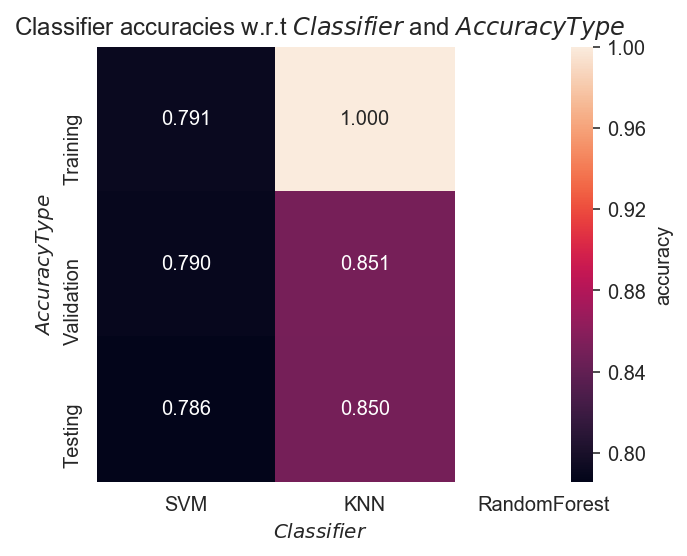

(1500, 24) (1500,)
Dataset, Classifier, Parition, Train Size, Trial: 1 0 0 0.2 0
train acc by param: [1.         0.86334775 0.86168946 0.85501425 0.85667263 0.85333921
 0.85333921 0.85333921 0.85333921 0.85333921 0.85333921 0.85333921
 0.85333921 0.85333921 0.85333921 0.85333921 0.85333921 0.85333921
 0.85333921 0.85333921 0.85333921 0.85333921 0.85333921 0.85333921
 0.85333921 0.85333921]
train acc: 0.8533392084802119
val acc by param: [0.68666667 0.85       0.82       0.84666667 0.83       0.85333333
 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333
 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333
 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333
 0.85333333 0.85333333]
val acc: 0.8533333333333334
test acc: 0.8383333333333334
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='uniform')
Dataset, Classifier, Parition

train acc by param: [1. 1. 1. 1. 1. 1. 1. 1.]
train acc: 1.0
val acc by param: [0.94333333 0.95333333 0.98       0.99333333 1.         1.
 1.         1.        ]
val acc: 1.0
test acc: 1.0
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Dataset, Classifier, Parition, Train Size, Trial: 1 1 0 0.2 1
train acc by param: [1. 1. 1. 1. 1. 1. 1. 1.]
train acc: 1.0
val acc by param: [0.93666667 0.95333333 0.97333333 0.99333333 1.         1.
 1.         1.        ]
val acc: 1.0
test acc: 1.0
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_f

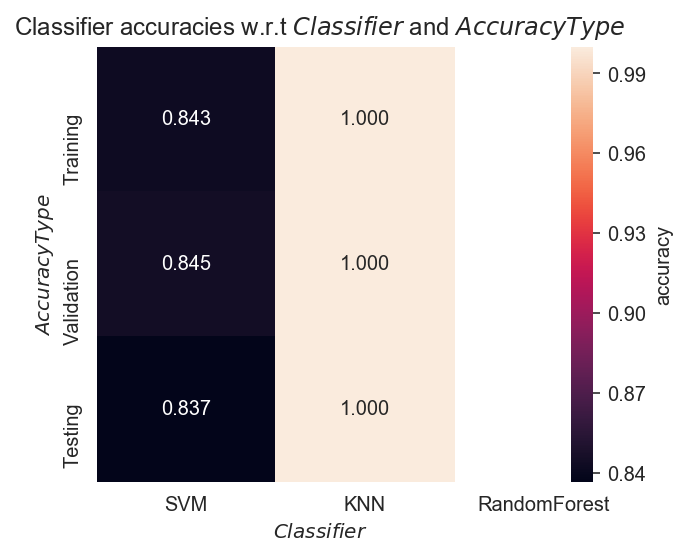

(1500, 57) (1500,)
Dataset, Classifier, Parition, Train Size, Trial: 2 0 0 0.2 0
train acc by param: [1.         0.90834013 0.90501508 0.90002338 0.90002338 0.898365
 0.89668996 0.89668996 0.89501492 0.89166483 0.89333988 0.89333988
 0.89333988 0.89333988 0.89333988 0.89333988 0.89333988 0.89333988
 0.89333988 0.89333988 0.89333988 0.89333988 0.89333988 0.89333988
 0.89333988 0.89333988]
train acc: 0.9000233755843897
val acc by param: [0.81666667 0.88666667 0.87333333 0.89333333 0.88666667 0.89
 0.89       0.89333333 0.89333333 0.89333333 0.89       0.89333333
 0.89333333 0.89333333 0.89333333 0.89333333 0.89333333 0.89333333
 0.89333333 0.89333333 0.89333333 0.89333333 0.89333333 0.89333333
 0.89333333 0.89333333]
val acc: 0.8933333333333333
test acc: 0.8816666666666667
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')
Dataset, Classifier, Parition, Train 

train acc by param: [1. 1. 1. 1. 1. 1. 1. 1.]
train acc: 1.0
val acc by param: [0.9        0.90666667 0.92333333 0.93       0.93       0.93666667
 0.93666667 0.94      ]
val acc: 0.94
test acc: 0.9775
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Dataset, Classifier, Parition, Train Size, Trial: 2 1 0 0.2 1
train acc by param: [1. 1. 1. 1. 1. 1. 1. 1.]
train acc: 1.0
val acc by param: [0.89666667 0.91       0.92       0.92666667 0.93333333 0.93333333
 0.93666667 0.94      ]
val acc: 0.94
test acc: 0.975
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
         

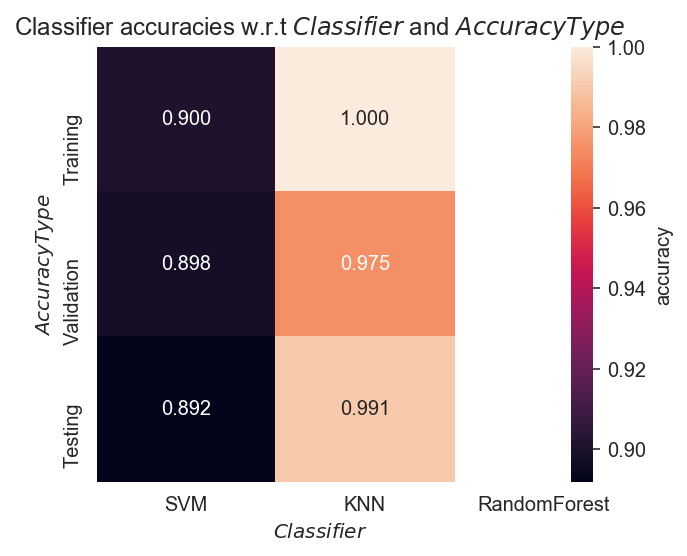

In [19]:
# lists for accuracies
clfNames = ['SVM', 'KNN', 'RandomForest']

for dataset in range(3):
    training = []
    validation = []
    testing = []
    for clfNum in range(2):
        train_part = []
        val_part = []
        test_part = []
        size = 0.2
        increment = 0.0
        for partition in range(3):
            test_fold = []
            train_fold = []
            val_fold = []
            
            if (dataset == 0):
                X = X_Y[:, :108]
                Y = X_Y[:, 108]
                print(X.shape, Y.shape)
            if (dataset == 1):
                X = X_Y[:, :24]
                Y = X_Y[:, 24]
                print(X.shape, Y.shape)
            if (dataset == 2):
                X = X_Y[:, :57]
                Y = X_Y[:, 57]
                print(X.shape, Y.shape)
            for idx in range(3):
                # Get features from train + val set. Get features from test set.     
                X_train_val, X_test = train_test_split(X, train_size = (size+increment), test_size = 1-(size+increment), shuffle=False)
                # Get labels from train + val set. Get labels from test set.  
                Y_train_val, Y_test = train_test_split(Y, train_size = (size+increment), test_size = 1-(size+increment), shuffle=False)
                
                print('Dataset, Classifier, Parition, Train Size, Trial:', dataset, clfNum, partition, (size+increment), idx)
                
                #if (clfNum == 0):
                #    # Consider linear kernel. Perform grid search for best C
                #    classifier = svm.SVC(kernel='linear')
                #    C_list = [10**-7, 10**-6, 10**-5, 10**-4, 10**-3] # Different C to try.
                #    parameters = {'kernel':['linear'], 'C':C_list}
                #    clf = GridSearchCV(classifier, parameters, cv=3, n_jobs=-1, return_train_score=True, iid=True).fit(X_train_val, Y_train_val)
                
                if (clfNum == 0):
                    # Consider K-Nearest Neighbors classifier. Perform grid search for best K values
                    classifier = neighbors.KNeighborsClassifier(n_jobs=-1)
                    K_list = []
                    # Fill K_list
                    for index in range(26):
                        K_list.append(index+1)
                    parameters = {'n_neighbors':K_list}
                    clf = GridSearchCV(classifier, parameters, cv=3, n_jobs=-1, return_train_score=True, iid=True).fit(X_train_val, Y_train_val)
                
                if (clfNum == 1):
                    # Consider Random Forest classifier. Perform grid search for best feature set at each split.
                    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
                    parameters = {'n_estimators':[1024], 'max_features':[1,2,4,6,8,12,16,20]}
                    clf = GridSearchCV(classifier, parameters, cv=3, n_jobs=-1, return_train_score=True, iid=True).fit(X_train_val, Y_train_val)

                # scoring
                train_acc = clf.cv_results_['mean_train_score'][clf.best_index_]
                print("train acc by param:", clf.cv_results_['mean_train_score'])
                print("train acc:", train_acc)
                train_fold.append(train_acc)
                
                val_acc = clf.cv_results_['mean_test_score'][clf.best_index_]
                print("val acc by param:", clf.cv_results_['mean_test_score'])
                print("val acc:", val_acc)
                val_fold.append(val_acc)
                
                test_acc = clf.score(X_test, Y_test)
                print("test acc:", test_acc)
                test_fold.append(test_acc)
                
                print('Best estimator:', clf.best_estimator_)
                
            mean_train = statistics.mean(train_fold)
            train_part.append(mean_train)
            train_fold.clear()
            
            mean_val = statistics.mean(val_fold)
            val_part.append(mean_val)
            val_fold.clear()
            
            mean_test = statistics.mean(test_fold)
            test_part.append(mean_test)
            test_fold.clear()
            
            increment += 0.3
        if (clfNum == 0):
            print('\nSVM accuracy')
        if (clfNum == 1):
            print('\nKNN accuracy')
        if (clfNum == 2):
            print('\nRandom Forest accuracy')
        
        t_acc = statistics.mean(train_part)
        print('Training accuracy:', t_acc)
        training.append(t_acc)
        train_part.clear()
              
        v_acc = statistics.mean(val_part)
        print('Validation accuracy:', v_acc)
        validation.append(v_acc)
        val_part.clear()
              
        te_acc = statistics.mean(test_part)
        print('Testing accuracy:', te_acc)
        testing.append(te_acc)
        test_part.clear()
    
    training = np.array(training)
    validation = np.array(validation)
    testing = np.array(testing)
    allacc = np.array([training, validation, testing])
    draw_heatmap_multi(allacc.reshape(3,2), 'Classifier accuracies', clfNames, ['Training', 'Validation', 'Testing'])